In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [24]:
traj = xr.open_dataset("/home/kbrennan/balloon_optimizer/lagranto/trajectory.4")

In [25]:
traj = traj.squeeze()
# fix time (time is now in hours.minutes, convert to decimal hours)
time = traj.time.values
hours = np.floor(time)
minutes = (time - hours) * 100
decimal_time = hours + minutes / 60
traj['time'] = decimal_time

# terminate trajectory that reaches the ground (p > 910 hPa)
if np.any(traj.p > 910):
    landing_index = np.where(traj.p > 910)[0]
    traj = traj.isel(time=slice(0, landing_index[0]))

In [26]:
traj

<xarray.Dataset> Size: 285kB
Dimensions:   (time: 421, dimx_lon: 27, dimx_BASEDATE: 6)
Coordinates:
  * time      (time) float32 2kB 0.0 -2.0 -1.167 -1.0 ... 67.5 67.67 67.83 68.0
Dimensions without coordinates: dimx_lon, dimx_BASEDATE
Data variables:
    lon       (time, dimx_lon) float32 45kB ...
    lat       (time, dimx_lon) float32 45kB ...
    p         (time, dimx_lon) float32 45kB 847.7 846.8 846.2 ... 787.4 792.0
    T         (time, dimx_lon) float32 45kB ...
    Q         (time, dimx_lon) float32 45kB ...
    balloon   (time, dimx_lon) float32 45kB ...
    BASEDATE  (time, dimx_BASEDATE) float32 10kB ...
Attributes:
    domxmin:              0.0
    domxmax:              0.0
    domymin:              0.0
    domymax:              0.0
    domzmin:              0.0
    domzmax:              0.0
    constants_file_name:  trajectory.4_cst

Text(0.5, 0, 'time after launch (h)')

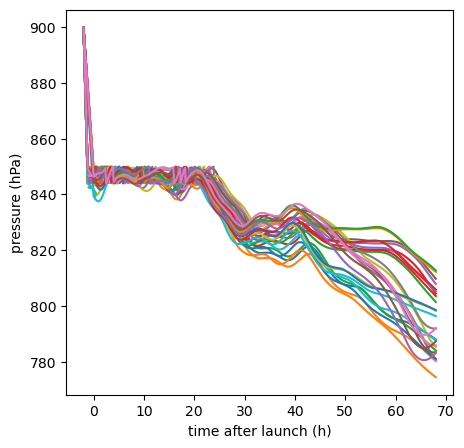

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(traj.time, traj.p)
ax.set_ylabel('pressure (hPa)')
ax.set_xlabel('time after launch (h)')


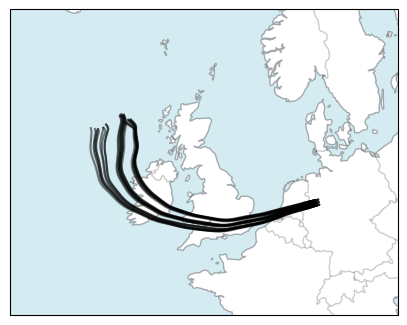

In [28]:
projection_center = (traj.lon.mean().values, traj.lat.mean().values)
padding = 5
projection = ccrs.RotatedPole(pole_longitude=projection_center[0]-180, pole_latitude=90-projection_center[1])
fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': projection})
ax.coastlines(alpha=0.3)
ax.add_feature(ccrs.cartopy.feature.OCEAN, facecolor='lightblue',alpha=0.5)
ax.add_feature(ccrs.cartopy.feature.BORDERS, alpha=0.2)

ax.plot(traj.lon, traj.lat, '-k', transform=ccrs.PlateCarree(), alpha=0.5)

ax.set_extent([traj.lon.min() - padding, traj.lon.max() + padding, traj.lat.min() - padding, traj.lat.max() + padding], crs=ccrs.PlateCarree())